# [DAT405 Assignment 2](https://chalmers.instructure.com/courses/10918/assignments/27620), Group 13
* Daniel Willim: 8 h
* Erik Jergéus: 8 h

# 1 Comparison of sold villas the past 12 months in Landvetter

### a Find a linear regression model that relates the living area to the selling price. If you did any data cleaning step(s), describe and explain why you did that.
In the code block below a linear model is created using `sklearn` and fit to the data. Before fitting, rows not containing values for both selling price and living area were removed. Since there is no way to know what these values should be and therefor impossible to plot. Any other missing data was replaced with zeros. 

*See figure below for a scatterplot of the data and in red the linear model* 

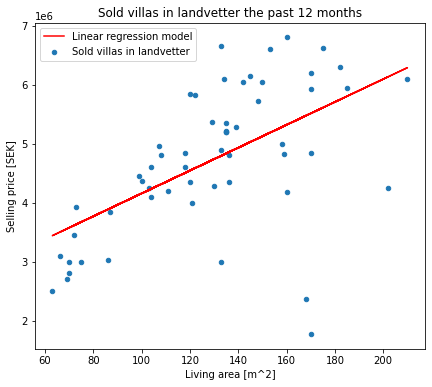

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression

# Load data
houses = pd.read_csv("data_assignment2.csv").set_index('ID')

# Clean data 
houses = houses.dropna(subset=['Living_area','Selling_price'])
houses = houses.fillna(0)

# Create and fit a linear model
living_area = houses.Living_area.values.reshape(-1, 1)  
selling_price = houses.Selling_price.values.reshape(-1, 1)
linear_regressor = LinearRegression()  
linear_regressor.fit(living_area, selling_price)  
selling_price_pred = linear_regressor.predict(living_area)

# Set size of figures
plt.rcParams['figure.figsize'] = [1*7, 1*6] #Resize figure to allow 1 subplots in x 

# Plot data with model 
houses.plot.scatter(x='Living_area', y='Selling_price', label="Sold villas in landvetter")
plt.plot(living_area, selling_price_pred, color='red', label="Linear regression model")


# Configure plots
plt.ylabel("Selling price [SEK]")
plt.xlabel("Living area [m^2]")
plt.title("Sold villas in landvetter the past 12 months")
plt.legend()
plt.show()

### b  What are the values of the slope and intercept of the regression line?

In [2]:
print(f"Intercept : {linear_regressor.intercept_[0]:,.2f}")

Intercept : 2,220,603.24


In [3]:
print(f"Slope: {linear_regressor.coef_[0][0]:,.2f}")

Slope: 19,370.14


### c Use this model to predict the selling prices of houses which have living area 100 m2, 150 m2 and 200 m2

In [4]:
print(f"Predicted selling price for houses with x living area:")
for m2 in [100, 150, 200]:
    print(f"{m2} m^2: {linear_regressor.predict([[m2]])[0][0]:,.0f} SEK")

Predicted selling price for houses with x living area:
100 m^2: 4,157,617 SEK
150 m^2: 5,126,124 SEK
200 m^2: 6,094,631 SEK


### d Draw a residual plot.
Below a residual plot is created. The line is a lowess smoother fit to the data to see if there is a trend in the residuals. 

*Technically seaborn first creates a new linear regression model for the residual plot, but since linear regression is determenistic and we use the same input data this should not be a problem.*

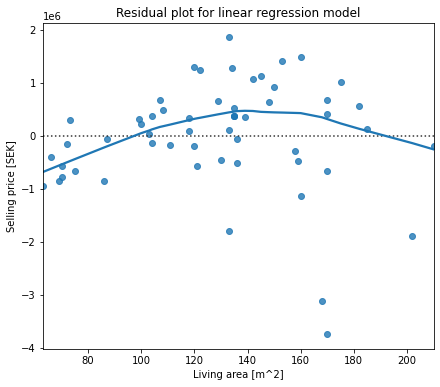

In [5]:
import seaborn as sns

# residuals
sns.residplot(x=living_area, y=selling_price, lowess=True)
plt.ylabel("Selling price [SEK]") 
plt.xlabel("Living area [m^2]")
plt.title("Residual plot for linear regression model")
plt.show()

### e Discuss the results, and how the model could be improved
We see from the scatterplot in 1a that there are quite a lot of variance in the data and therefore it will be impossible to find a perfect fit regardless of the function used. 

But from the scatter plot we also see that there is some correlation between selling price and living area. Intuitively this makes sense, when selling a house there are many variables to take into account like the state of the house or the house's age, but a good rule of thumb still is that a larger house in the same area will cost more and this is also what our data analysis shows. 

There are a several things that could be done to improve the model, one could for example add another variable to the model and instead fit a line in 3d space. A good choice from the data we have is to add age to our model as from the table below we see that selling price is somewhat correlated to three of our variables, *living area*, *rooms* and *age*. But *living area* and *rooms* are highly correlated to each other (which we can both see in the correlation table and it's quite intuitive) therefor adding *rooms* to our model would not improve it that much. Hence our best choice would be to add *age* to model. 

Another way to improve the model would be to try and fit a high order polynomial to the data. From the residual plot we see that the residuals are unbalanced and the lowess line shows that the data has a square trend to it, therefore one could try to fit a second order polynomial to the data. 


In [6]:
#Print correlation between variables
print("Correlation between columns in houses dataframe:")
houses.corr()

Correlation between columns in houses dataframe:


,Living_area,Rooms,Land_size,Biarea,Age,Selling_price
Living_area,1.000000,0.778441,-0.054219,-0.351062,-0.422667,0.561956
Rooms,0.778441,1.000000,-0.175584,-0.165530,-0.315432,0.499236
Land_size,-0.054219,-0.175584,1.000000,0.298340,0.455108,-0.037107
Biarea,-0.351062,-0.165530,0.298340,1.000000,0.408238,-0.224450
Age,-0.422667,-0.315432,0.455108,0.408238,1.000000,-0.481619
Selling_price,0.561956,0.499236,-0.037107,-0.224450,-0.481619,1.000000


# 2 Iris data set

### a Use a confusion matrix to evaluate the use of logistic regression to classify the iris data set

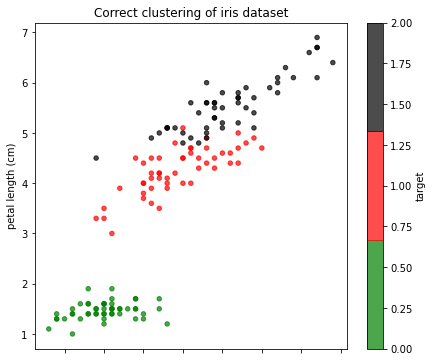

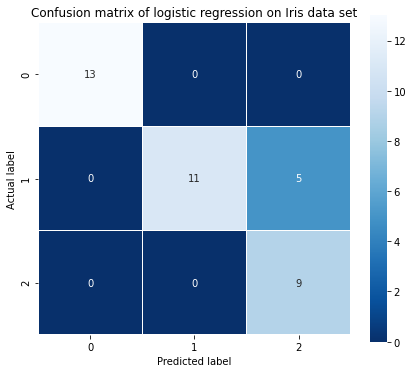

In [7]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from matplotlib import colors

# Load data
iris = load_iris() 
iris_df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                    columns= iris['feature_names'] + ['target'])

# Scatterplot the data with color as target
iris_df.plot.scatter(x="sepal length (cm)",y="petal length (cm)", c="target", 
                     cmap=colors.ListedColormap(['green','red','black']), alpha=.7)

plt.xlabel("Sepal length [cm]") 
plt.xlabel("Petal length [cm]")
plt.title("Correct clustering of iris dataset")
plt.show()

# Split data into train and test set (25% test size)
x_train, x_test, y_train, y_test = train_test_split(iris.data, 
                                                    iris.target, 
                                                    test_size=0.25,
                                                    random_state=0)

# Use logistic regression on the data with sklearn package
logisticRegr = LogisticRegression(multi_class='ovr', solver='liblinear')
logisticRegr.fit(x_train, y_train)

pred = logisticRegr.predict(x_test)

# Make a confusion matrix from the prediction and test set
cm_logr = metrics.confusion_matrix(y_test, pred)

sns.heatmap(cm_logr, annot=True, fmt=".0f", linewidths=.5, 
            square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
plt.title('Confusion matrix of logistic regression on Iris data set')
plt.show()

### b Use k-nearest neighbours to classify the iris data set with some different values for k, and with uniform and distance-based weights. What will happen when k grows larger for the different cases? Why?

When *k* grows it's apparent that the approximation will not differ before *k* approaches values greather than  ~20. Generally a low *k*, of for example 1, leads to unstable decision boundaries, however for this data set this is fine. In general it would probably be more wise to have atleast a slightly higher *k* to increase the stability. Furthermore we can see that it does not have any negative affect on the accuracy with higher and more stable *k* of 3-17. According to some sources **(1)** it seems that the optimal value of *k* is usually found around the square root of the amount of samples, which in our case would be ~14. However most opinions in regards to choosing optimal *k* seems to be loosely based on research and instead mostly cocksureness (since almost no one in a quick googling cites their sources and instead seems to base it on their own experiences), which makes us believe it is so heavily dependent on the data set in question that the best *k* is probably easiest to find by simply empirically testing different values and choosing the one with the lowest error score (by for example using a validation set).

For our case we can see that high *k* values greatly decreases the accuracy of the uniform weight classifier and this is due to underfitting, which can be prevented by either valuing the neighbours based on relevance (as in the distance weight classifier) or by simply picking a more appropriate value of *k*. In the extreme case where *k* approaches the sample size the method just looks at which case is the most common and guesses that all data should be of that case, which is obviously too naive.

Comparing the distance classifier to the uniform one it seems that the distance classifier is less prone to underfitting, and as such could be more efficient to use in cases where the optimal *k* is hard to compute. The benefit of the uniform classifier probably mostly comes from the efficiency and simplicity of the method and could as such be more appropriate in very large samples or samples were the highest possible assurance of the quality is not necessary.


**(1)** A. Band "How to find the optimal value of K in KNN?" [Online], *towards data science*, (Accessed: 17/11-2020)

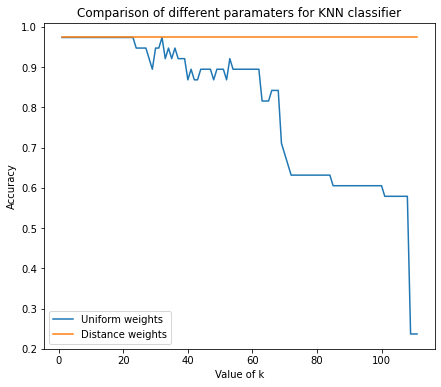

In [8]:
from sklearn.neighbors import KNeighborsClassifier

# Get the prediction scores for all values of k with uniform weight
uniform_scores = []
for k in range(1,len(x_train)):
    #Create KNN Classifier (default weight is uniform)
    knn = KNeighborsClassifier(n_neighbors=k)

    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)

    uniform_scores.append(metrics.accuracy_score(y_test, y_pred))

plt.plot(range(1,len(x_train)),uniform_scores, label="Uniform weights")

# Get the prediction scores for all values of k with distance weight
distance_scores = []
for k in range(1,len(x_train)):
    #Create KNN Classifier
    knn = KNeighborsClassifier(n_neighbors=k, weights="distance")

    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)

    distance_scores.append(metrics.accuracy_score(y_test, y_pred))
    

plt.plot(range(1,len(x_train)),distance_scores, label="Distance weights")
plt.legend()
plt.title('Comparison of different paramaters for KNN classifier')
plt.ylabel('Accuracy')
plt.xlabel('Value of k')
plt.show()

### c. Compare the classification models for the iris data set that are generated by k-nearest neighbours (for the different settings from question 3) and by logistic regression. Calculate confusion matrices for these models and discuss the performance of the various models.

In the comparison we use the k-nearest neighbour classifier with uniform weights and *k=1* as that has been shown in 2b to give the lowest error score (among other *k* values). 

From the confusion matrices it can be concluded that the KNN classifier works better for this data set. However, do note that both models only failed on the same kind of prediction, where the actual value was "1" but the models guessed on "2".

Even though logistic regression did not work as well in our case, that does not mean it is always worse. For example logistic regression outputs probabilities which means that it could be easier to integrate into other probabilistic methods. Furthermore it would simultaneously deduce if the relationship between the data and target follows a linear relationship.

It seems to be the case that this data set is not linearly defined and therefore is less appropriate to use logistic regression for, as K-nearest neighbour can learn non-linear similarities.

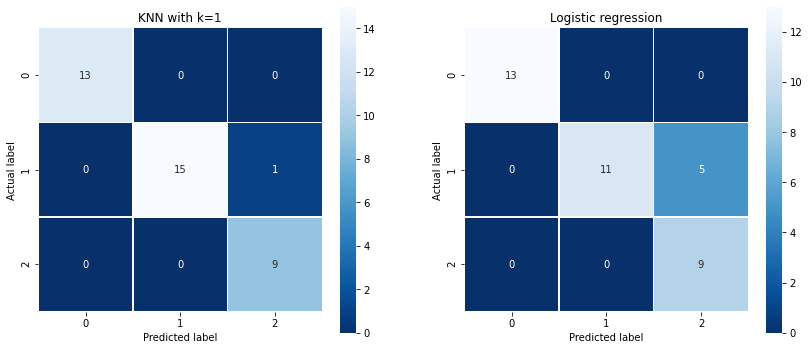

In [9]:
knn = KNeighborsClassifier(n_neighbors=1) 

knn.fit(x_train, y_train)

y_pred = knn.predict(x_test)

# Create confusion matrix for uniform weight and k = 1
cm_knn = metrics.confusion_matrix(y_test, y_pred)


plt.rcParams['figure.figsize'] = [2*7, 1*6] #Resize figure to allow 2 subplots in x 

fig, (ax1,ax2) = plt.subplots(1,2)
sns.heatmap(cm_knn, annot=True, fmt=".0f", linewidths=.5, square = True, \
            cmap = 'Blues_r', ax=ax1);
# Plot the confusion matrix from 2a as a subplot
sns.heatmap(cm_logr, annot=True, fmt=".0f", linewidths=.5, square = True, \
            cmap = 'Blues_r', ax=ax2);

ax1.set_ylabel('Actual label');
ax1.set_xlabel('Predicted label');
ax1.set_title("KNN with k=1")

ax2.set_ylabel('Actual label');
ax2.set_xlabel('Predicted label');
ax2.set_title("Logistic regression")

plt.show()

# 3 Explain why it is important to use a separate test (and sometimes validation) set
When using the methods used in this lab what we're acctually trying to achive is to take a set of data and "learn" it's patterns to be able make predictions about datapoints not in our original set.

In order to rate the accuracy of the model's predictions we need to have a set of data which we know the correct classification for. But this needs to be data that the model has not seen yet to mitigate the effects of overfitting. If the testdata was part of the training data a good strategy for the model would be just to "remember" the values and get a 100% accuracy on the test data. But if it would then be presented with a data point not in the traing set the prediction might be way off.

This is even more important when using many or unlimited variables, as if we had a 100 degree polynomial the model could potentially account for all outliers and hit every data point perfectly. That would however mean that the model is heavily overfitted and would be awful on a test set, thus we can use test sets to avoid overfitting. Furthermore the test set allows us to compare different models in an unbiased way, for example we can check if the model from 1a would be more accurate if we'd use a two dimensional polynomial. Then we could evaluate both models and be certain that our answer is just.

Validation set was not used in this exercise, but it can be important to determine parameters for the model. For example, if we had a more sophisticated algorithm we could use a validation set, so that the algorithm could evaluate which degree of polynomial that would be optimal, on its own. This can not be the same as the test set if we still want to make an unbiased selection between models, since we used the validation set to "learn" the parameters, just like how we used the training set to learn.